In [1]:
import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz

In [2]:
az.style.use('arviz-doc')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [3]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="50">
<br>
<br>
<br>
<br>
<h1 align="center">Inferencia Bayesiana</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos


* Repasar el teorema de Bayes
* Repasar conceptos centrales en estadística Bayesiana
* Discutir el rol e interpretación de las probabilidades en estadística Bayesiana
* Comprender las diferencias entre distribuciones a priori, a priori predictiva, a posteriori y a posteriori predictiva 

## Modelado Bayesiano

<br>

* La estadística es una forma de modelado 

* Los modelos estadísticos generan datos

* Un modelo Bayesiano tiene dos requisitos:
    1. Las cantidades desconocidas (parámetros) son modeladas usando **distribuciones de probabilidad**
    2. Las cantidades conocidas (datos) son combinadas con la **distribución a priori de parámetros** usando el **Teorema de Bayes**

## Teorema de Bayes

$$\underbrace{p(\theta \mid Y)}_{a \ posteriori} = \frac{\overbrace{p(Y \mid \theta)}^{\text{likelihood}}\; \overbrace{p(\theta)}^{a \ priori}}{\underbrace{\color{red}{p(Y)}}_{\text{likelihood marginal}}}$$
<br>

* $\theta$ representa los parámetros en nuestros modelos (lo que queremos averiguar o aprender)
* $Y$ representa los datos

* El objeto central de la estadística Bayesiana es la distribución _a posteriori_.

* $\color{red}{p(Y) = \int_{\Theta} p(Y \mid \theta)p(\theta) d(\theta)}$ Generalmente no tiene solución analítica o es muy costosa --> métodos numéricos al rescate!

<center><img src="img/modelado_probabilista.png" width=500 /></center>

## Estadística Bayesiana

<br>

* Las distribuciones de probabiliad _distribuyen_ probabilidades (credibilidades) entre un cierto conjunto de eventos


* La estadística Bayesiana es la re-distribución de probabilidades (credibilidades)


<center><img src="img/con.gif" width=500 /></center>

## Estadística Bayesiana en 3 pasos (flujo Bayesiano simplificado)

<br>
 

1. **Crear un modelo probabilista**. Especificar un modelo de probabilidad que incluya algún tipo de conocimiento previo sobre los parámetros del modelo


2. **Condicionar el modelo a los datos observados**. Usando el teorema de Bayes la distribución a priori es actualizada de acuerdo a los datos observados,  obteniendose la distribución _a posteriori_.


3. <font color = "gray"> **Evaluar el ajuste del modelo a los datos y la sensibilidad de las conclusiones a cambios en los supuestos del modelo**. </font>

## Estadística de monedas mágicas

<br>

* Queremos modelar el resultado de arrojar una moneda al aire.
    * Resultado de una prueba de diagnóstico médico (positivo o negativo).
    * Compra de un producto en una tienda en línea (realizada o no realizada).
    * Tasa de conversión de clientes que recibieron un vourcher

* Nuestro parámetro, $\theta$, puede tomar valores en el intervalo [0, 1]
    * $\theta = 1 \implies$ siempre cara
    * $\theta = 0 \implies$ siempre ceca

* De acuerdo al teorema de Bayes es necesario definir un *likelihood* y un *prior*:


$$p(\theta \mid Y) \propto \underbrace{p(Y \mid \theta)}_{\text{?}} \; \underbrace{p(\theta)}_{?}$$

## El modelo beta-binomial (Representación matemática)

<br>
<br>

$$
\overbrace{\theta \sim \operatorname{Beta}(\alpha, \beta)}^{\text{prior}}\\[10pt]
\underbrace{Y \sim \operatorname{Bin}(n=1, p=\theta)}_{\text{likelihood}}
$$

## El modelo beta-binomial (Representación visual)


* De arriba hacia abajo tenemos: 
   * La distribución a priori
   * El likelihood
   * los datos.
    
* Las flechas indican la relación entre las partes del modelo, el símbolo $\sim$ la naturaleza estocástica de las variables.
        
<img src="img/modelo_1_moneda.png" width=300>



In [4]:
pz.Beta(2, 2).plot_interactive()

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

In [10]:
pz.Binomial(1, 0.5).plot_interactive(xy_lim=(-0.1, 1.1))

interactive(children=(IntSlider(value=1, description='n (0, inf)', max=11, style=SliderStyle(description_width…

### La distribución *a posteriori*

* Para algunos modelos es posible obtener la distribución a posteriori de forma analítica

* Defininición: Una distribución a priori es conjugado con el likelihood, si la distribución a posteriori es de la misma familia que la del prior

* La distribución Beta es prior conjugado de la Binomial
<br>

$$
p(\theta \mid \mathbf{Y}) = \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$


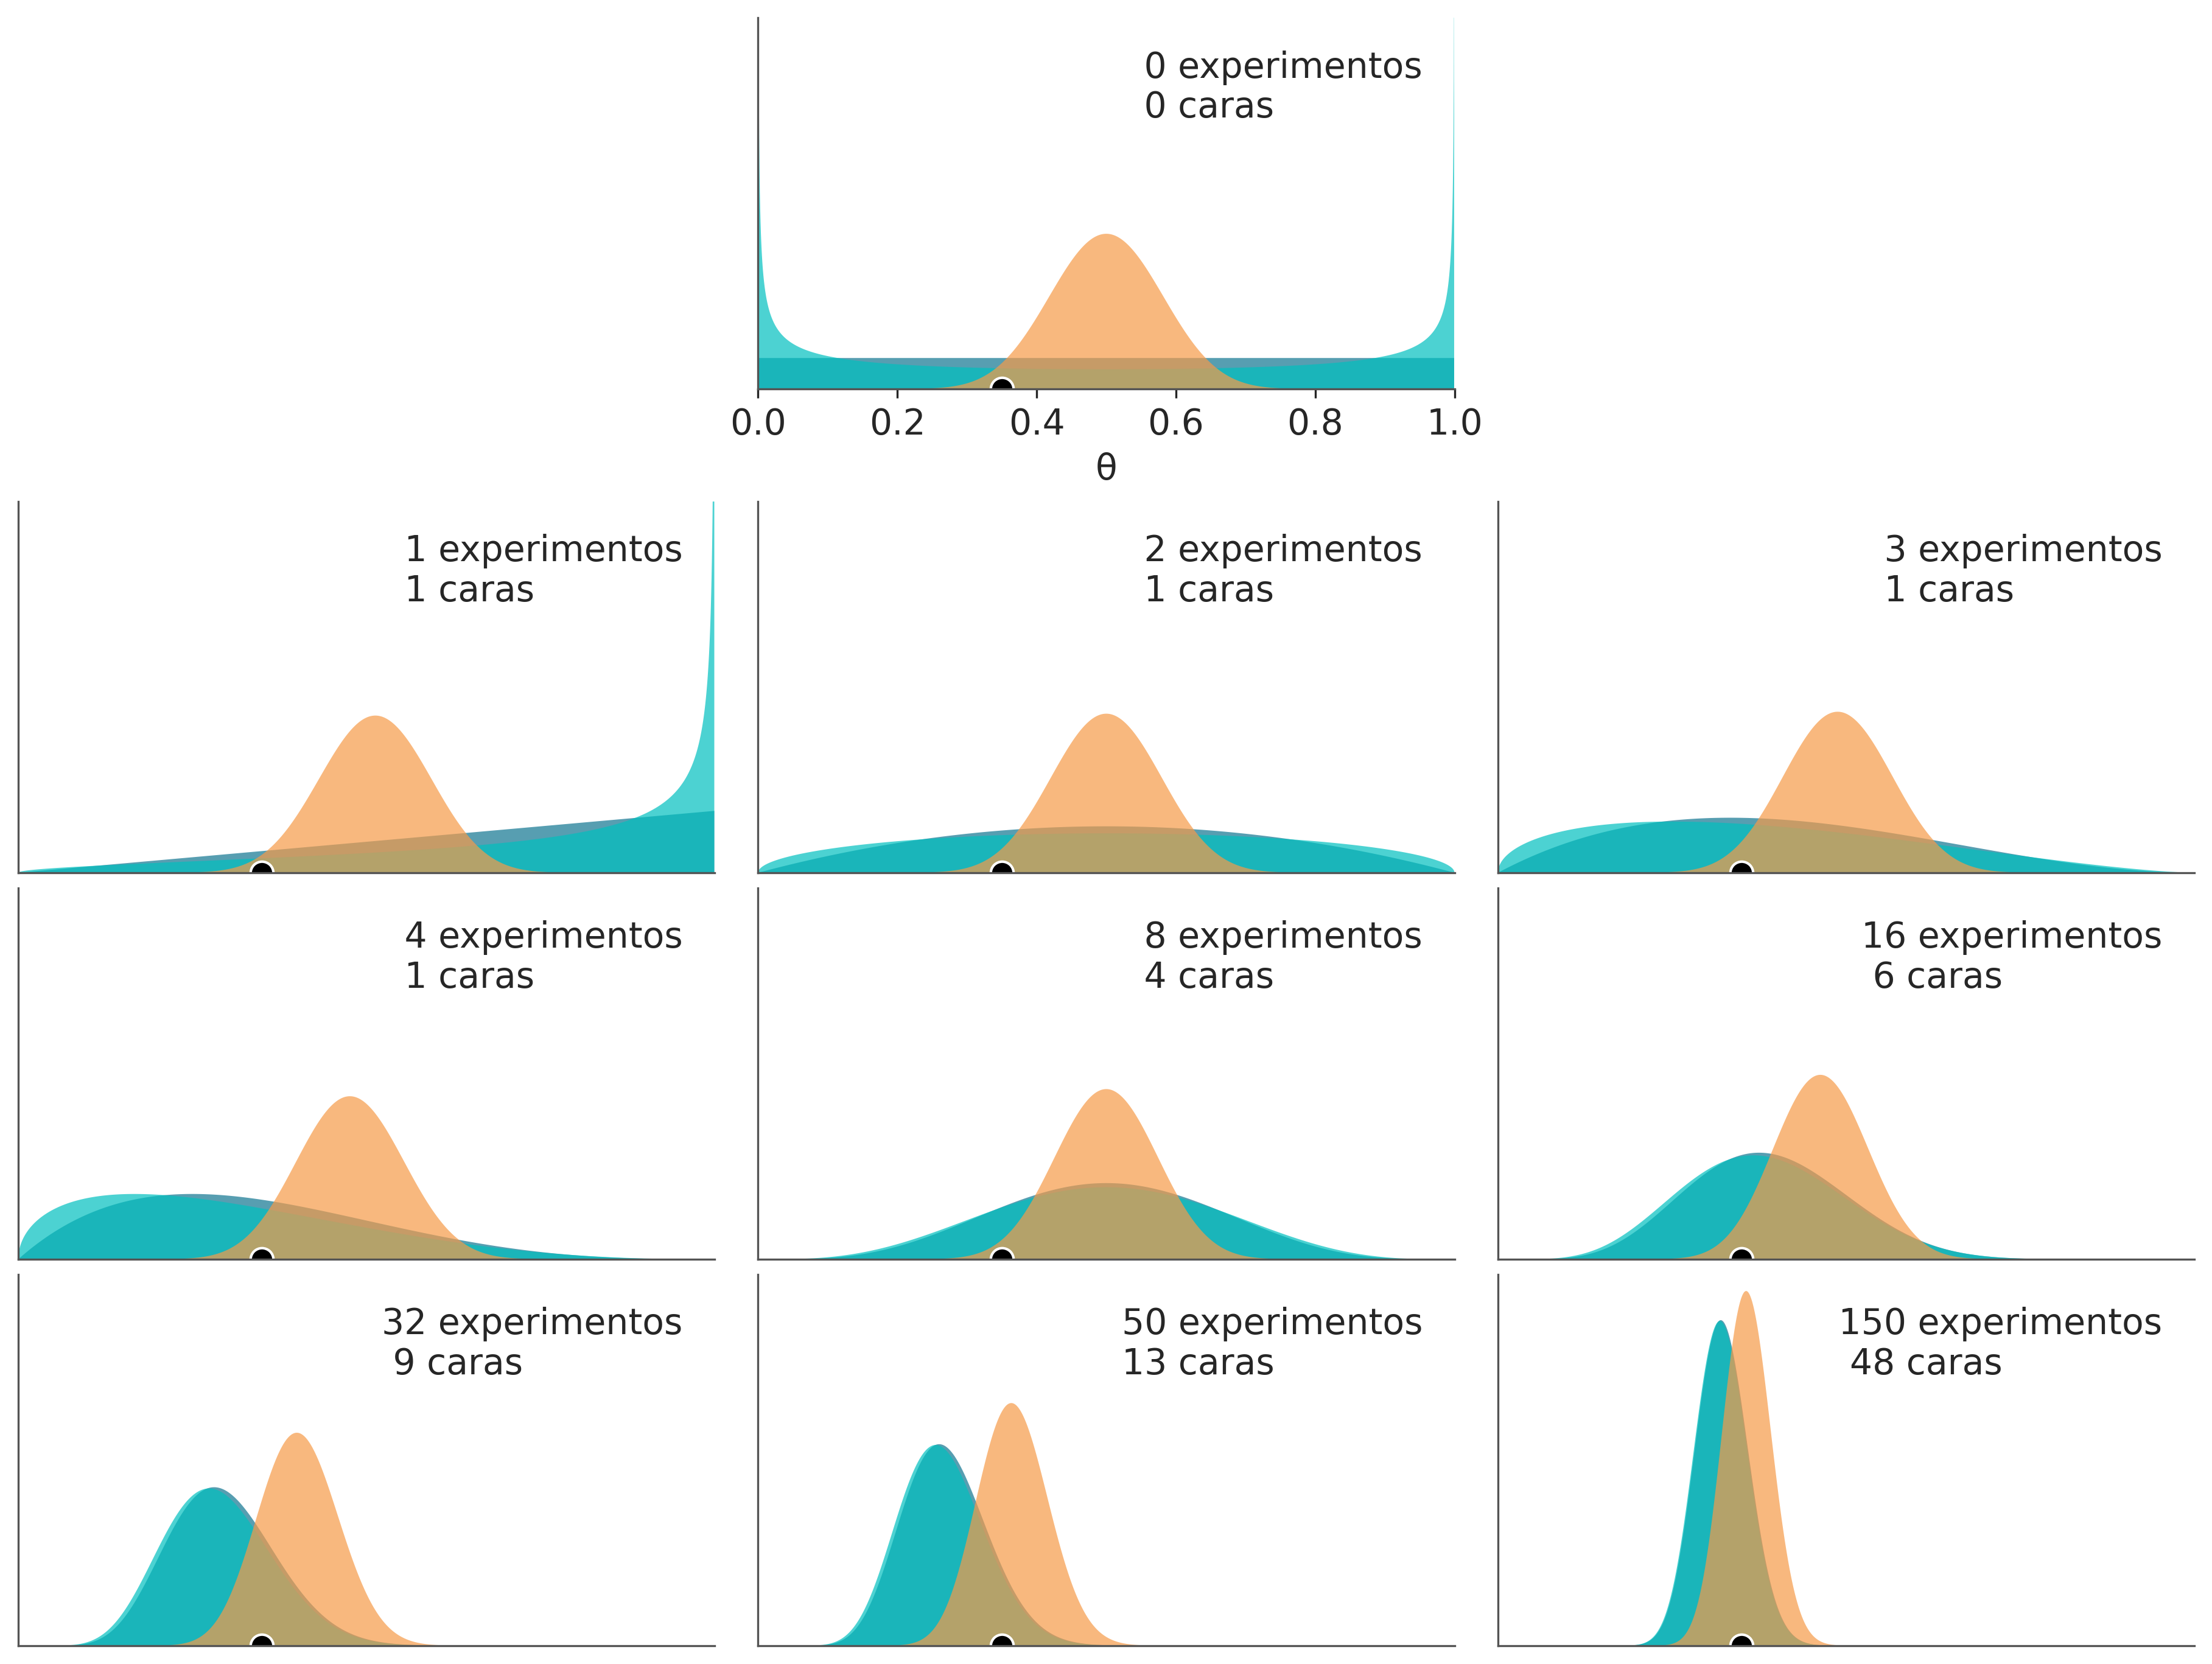

In [5]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

## Resumen

<br>

* La solución de un modelo Bayesiano es siempre una distribución
* La distribución _a posteriori_ representa los valores plausibles de los parámetros
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución)
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores


## Resumen

<br>

* El resultado de un modelo Bayesiano usando un _a priori_ plano o no-informativo (el azul en el ejemplo anterior) en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).
* Dada una cantidad infinita de datos el _a priori_ es irrelevante
* Los priors son útiles para incorporar información de dominio
* A veces basta con incorporar información vaga, "tal parámetro es positivo"
* Los priors son útiles para regularizar (evitar valores ridículos o fisicamente poco-plausibles)

## En la distribución a posteriori confiamos

* La distribución a posteriori es la consecuencia lógica de combinar los datos con el modelo
* Esa distribución contiene toda la información de un problema, y por lo tanto todas las respuestas a nuestro problema

<br>

* OK, antes de fundar la iglesia Bayesianista, hay que recorar que lo antedicho es válido en sentido matemático.
* En el mundo real donde no existen ni las probabilidad ni las gaussianas, ni los círculos. Las cosas son algo más complejas.
* Rara vez un modelo es correcto, rara vez los datos están "limpios", rara vez las aproximaciones son exactas, rara vez no omitimos variables, etc.

## Distribución predictiva a priori

**Conceptualmente**: es la distribución de datos predicha por el modelo antes de haber visto los datos


**Matemáticamente**

$$
p(y^\ast) =  \int p(y \mid \theta) p(\theta) d\theta
$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a priori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

<center><img src="img/modelo_1_moneda.png" width=400></center>

## Distribución predictiva a posteriori

**Conceptualmente**: es la distribución de datos predicha ($\tilde{y}$) de acuerdo a la distribución *a posteriori* (y los ya datos observados)


**Matemáticamente**

$$p(\tilde{y} \,|\, y) = \int p(\tilde{y} \,|\, \theta) \, p(\theta \,|\, y) \, d\theta$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a posteriori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

<center><img src="img/modelo_1_moneda.png" width=400></center>

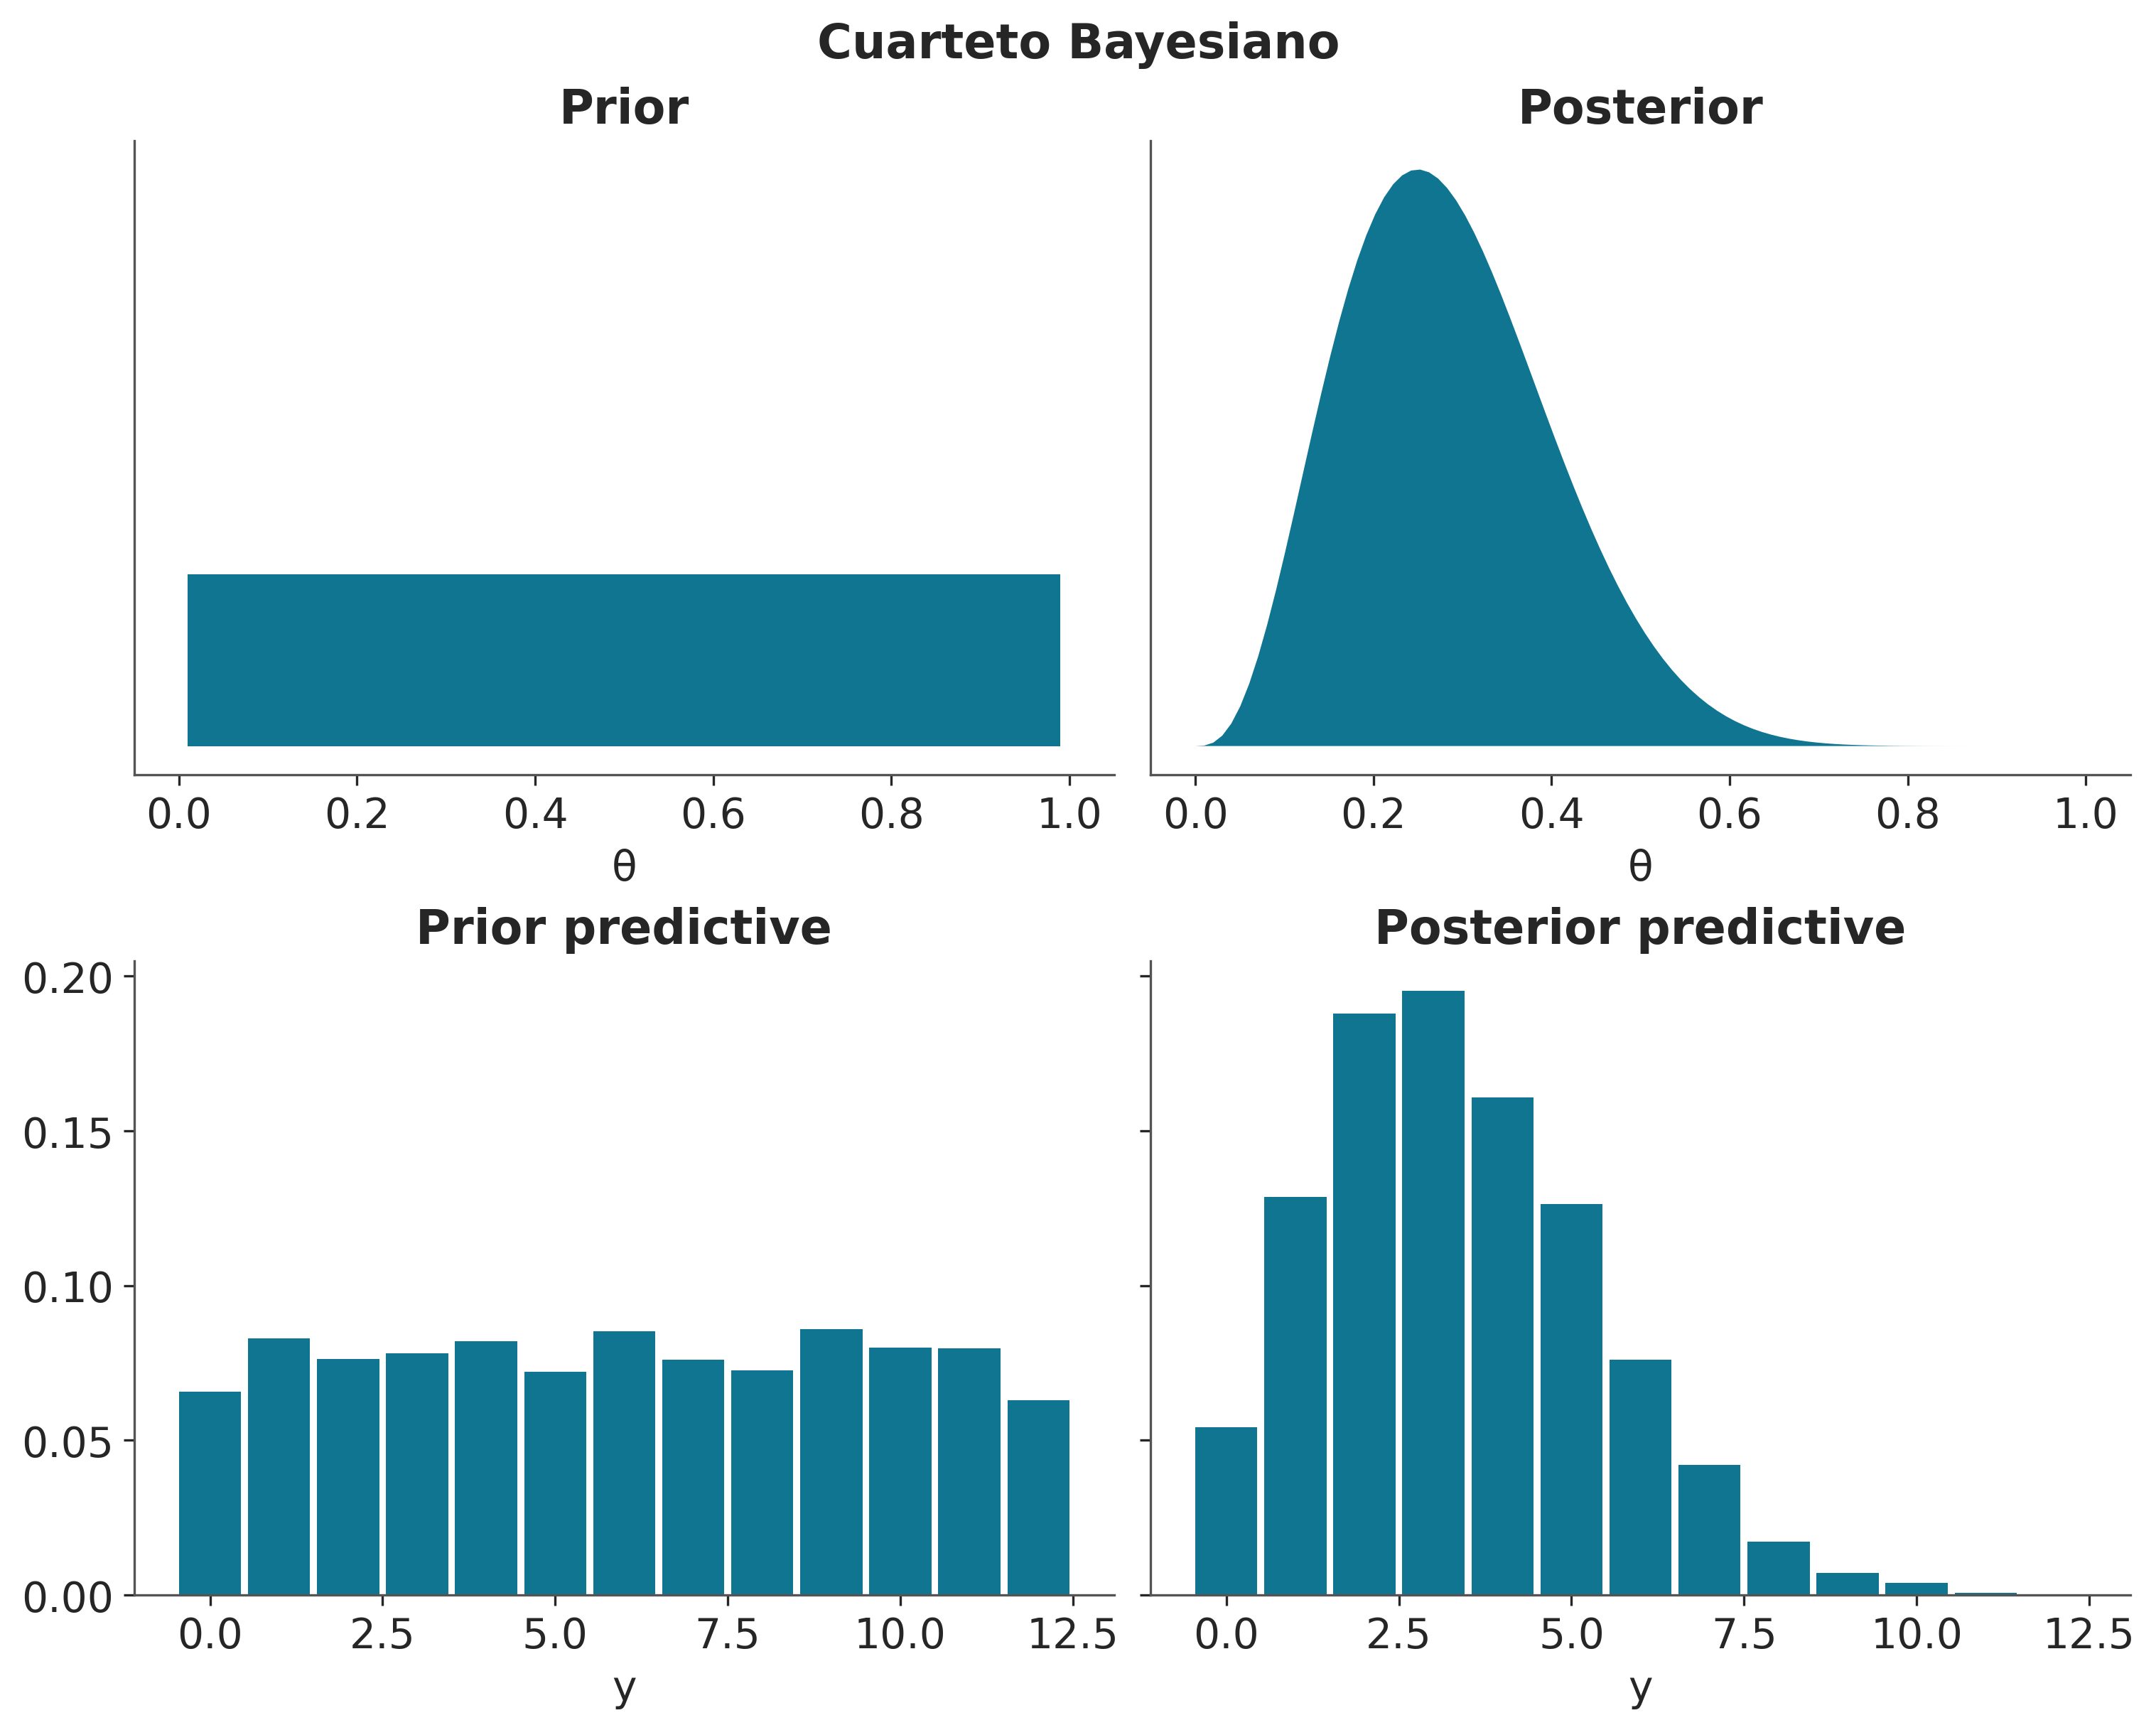

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex="row", sharey="row")
axes = np.ravel(axes)
dist = pz.Beta
a_prior = 1
b_prior = 1
N = 12
y = 3
x = np.linspace(0, 1, 100)


prior = dist(a_prior, b_prior).pdf(x)
axes[0].fill_between(x, 0, prior)
axes[0].set_title("Prior")
axes[0].set_xlabel("θ")
axes[0].set_yticks([])


posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
axes[1].fill_between(x, 0, posterior)
axes[1].set_title("Posterior")
axes[1].set_xlabel("θ")


prior = dist(a_prior, b_prior).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in prior])
axes[2].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[2].set_title("Prior predictive")
axes[2].set_xlabel("y")

posterior = dist(a_prior + y, b_prior + N - y).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in posterior])
axes[3].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[3].set_title("Posterior predictive")
axes[3].set_xlabel("y")

fig.suptitle("Cuarteto Bayesiano", fontweight="bold", fontsize=16);

## Recapitulando

* Los modelos producen datos
* Los modelos tienen parámetros desconocidos
* A los parámetros les asociamos distributiones de probabilidad *a priori*
* El teorema de Bayes nos permite combinar datos con distribuciones *a priori*
* La distribución *a posteriori* es la distribución conjunta de los parámetros, luego de haber observado datos
* En general esperamos que la distribución *a posteriori* tenga menos incerteza que la distribución *a priori*
* La distribución predictiva *a priori* es la distribución que el modelo espera ver, antes de haber visto los datos
* La distribución predictiva *a posteriori* es la distribución que el modelo espera ver, luego de haber visto los datos

<img src="img/bayesian_workflow.png" width=500>

## Ejercicios

1. Supongamos que tenemos dos monedas una que cae la mitad de veces cara y la mitad ceca y una moneda trucada que cae siempre cara. Si tomamos una de las monedas al azar y obtenemos cara, cual es la probabilidad que esa moneda sea la trucada.


2. El problema del diagnóstico. En una población una de cada mil personas tiene una enfermedad. Una persona tomada al azar de esa población da positivo en un test para dicha enfermedad. El test da positivo el 99 % de las veces que una persona tiene la enfermedad. Dicho test tiene además una tasa de falsos positivos del 5 %.

    1. ¿Cuál es la probabilidad de que dicha persona tenga la enfermedad?
    
    1. Si realizamos el mismo análisis una segunda vez sobre el mismo paciente y obtenemos nuevamente positivo ¿Cuál seria la probabilidad que el paciente esté enfermo? ¿Y si diera negativo? ¿Para el segundo análisis el *a priori* es el mismo que para el primer caso?


3. Usando `p_θ_dado_y = stats.beta.pdf(x, α + y, β + N - y)` con `x = np.linspace(0, 1, 2000)` calcular el posterior de un modelo binomial. ¿Cuál es la probabilidad que los valores de θ se encuentren en el intervalo comprendido entre 0.45 y 0.55 para cada uno de los siguientes casos?
    1. α = β = 1, N = 4, y = 2
    2. α = β = 2, N = 4, y = 2
    3. α = β = 1, N = 40, y = 20
    4. α = β = 2, N = 40, y = 20
    5. Elija valores para  α, β, N e y

4. Usando el mismo modelo del punto anterior para α = β = 1, N = 16, y = 5
    1. ¿Cuál es el valor de θ por debajo del cual tenemos el 20% de densidad de probabilidad?
    2. ¿Cuál es el valor de θ por encima del cual tenemos el 20% de densidad de probabilidad?
    3. ¿Cual intervalo contiene el 40% de la densidad de probabilidad?

5. Use la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enuncie las conclusiones que considere más relevantes.

In [9]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).rv_frozen.pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).rv_frozen.pmf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…